Importing the dependencies

In [510]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression

In [511]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [512]:
df.shape

(303, 14)

In [513]:
df['target'].value_counts()

,count
target,
1,165
0,138


In [514]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [515]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [516]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [517]:
columns_in_df=df.columns
columns_in_df

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [518]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Correlation Matrix

In [543]:
correlate=df.corr()

<Axes: >

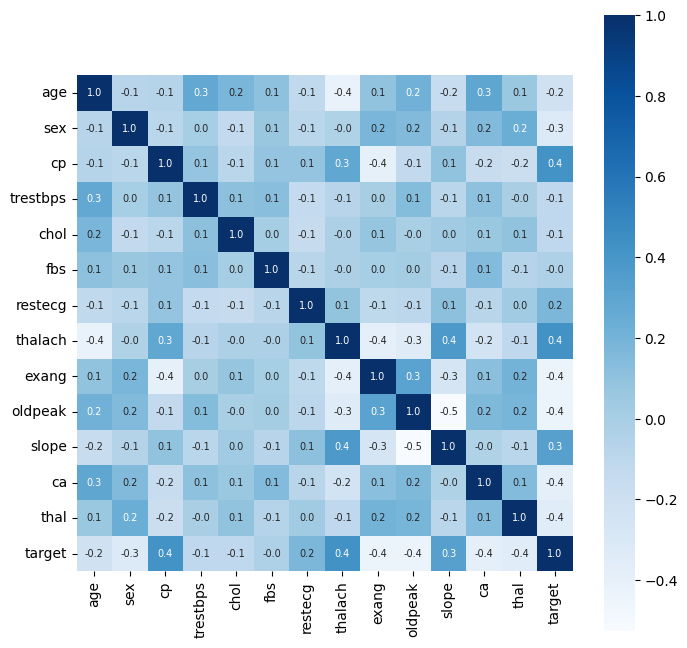

In [544]:
plt.figure(figsize=(8,8))
sns.heatmap(correlate,annot=True,fmt=".1f",square=True,annot_kws=({'size':7}),cmap="Blues")

Identifying outlayers in the data

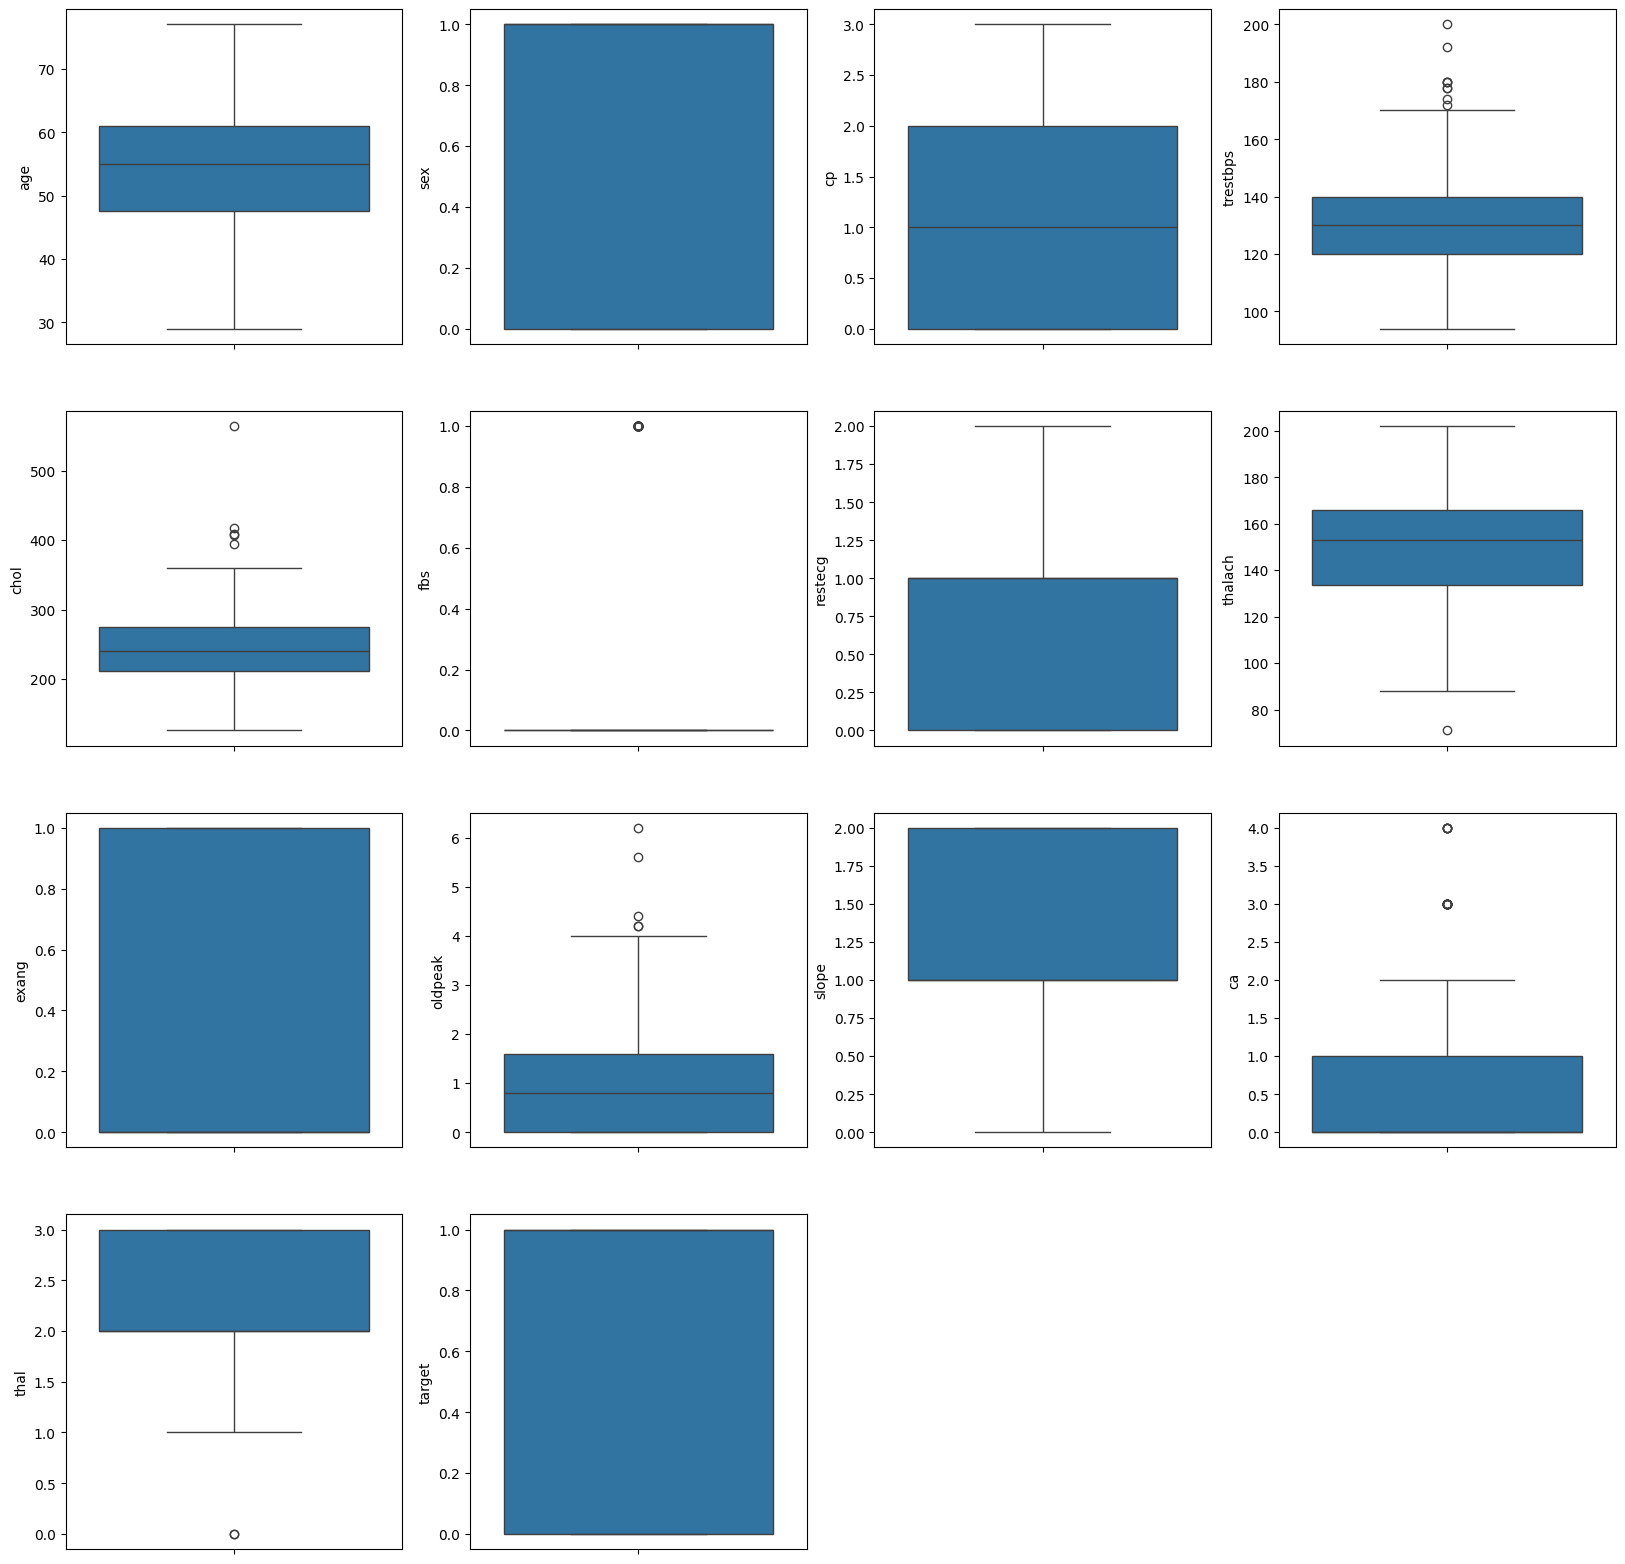

In [519]:
plt.figure(figsize=(20,20))
a=1

for i in columns_in_df:

    plt.subplot(4,4,a)

    sns.boxplot(data=df,y=i)

    a=a+1

In [520]:
outlayer_columns=['trestbps','chol', 'thalach', 'oldpeak']



for i in outlayer_columns:

    Q1=df[i].quantile(0.25)
    Q2=df[i].quantile(0.5)
    Q3=df[i].quantile(0.75)

    IQR=Q3-Q1

    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR

    df=df[(df[i]>=lower_bound)&(df[i]<=upper_bound)]



Outlayers Removal

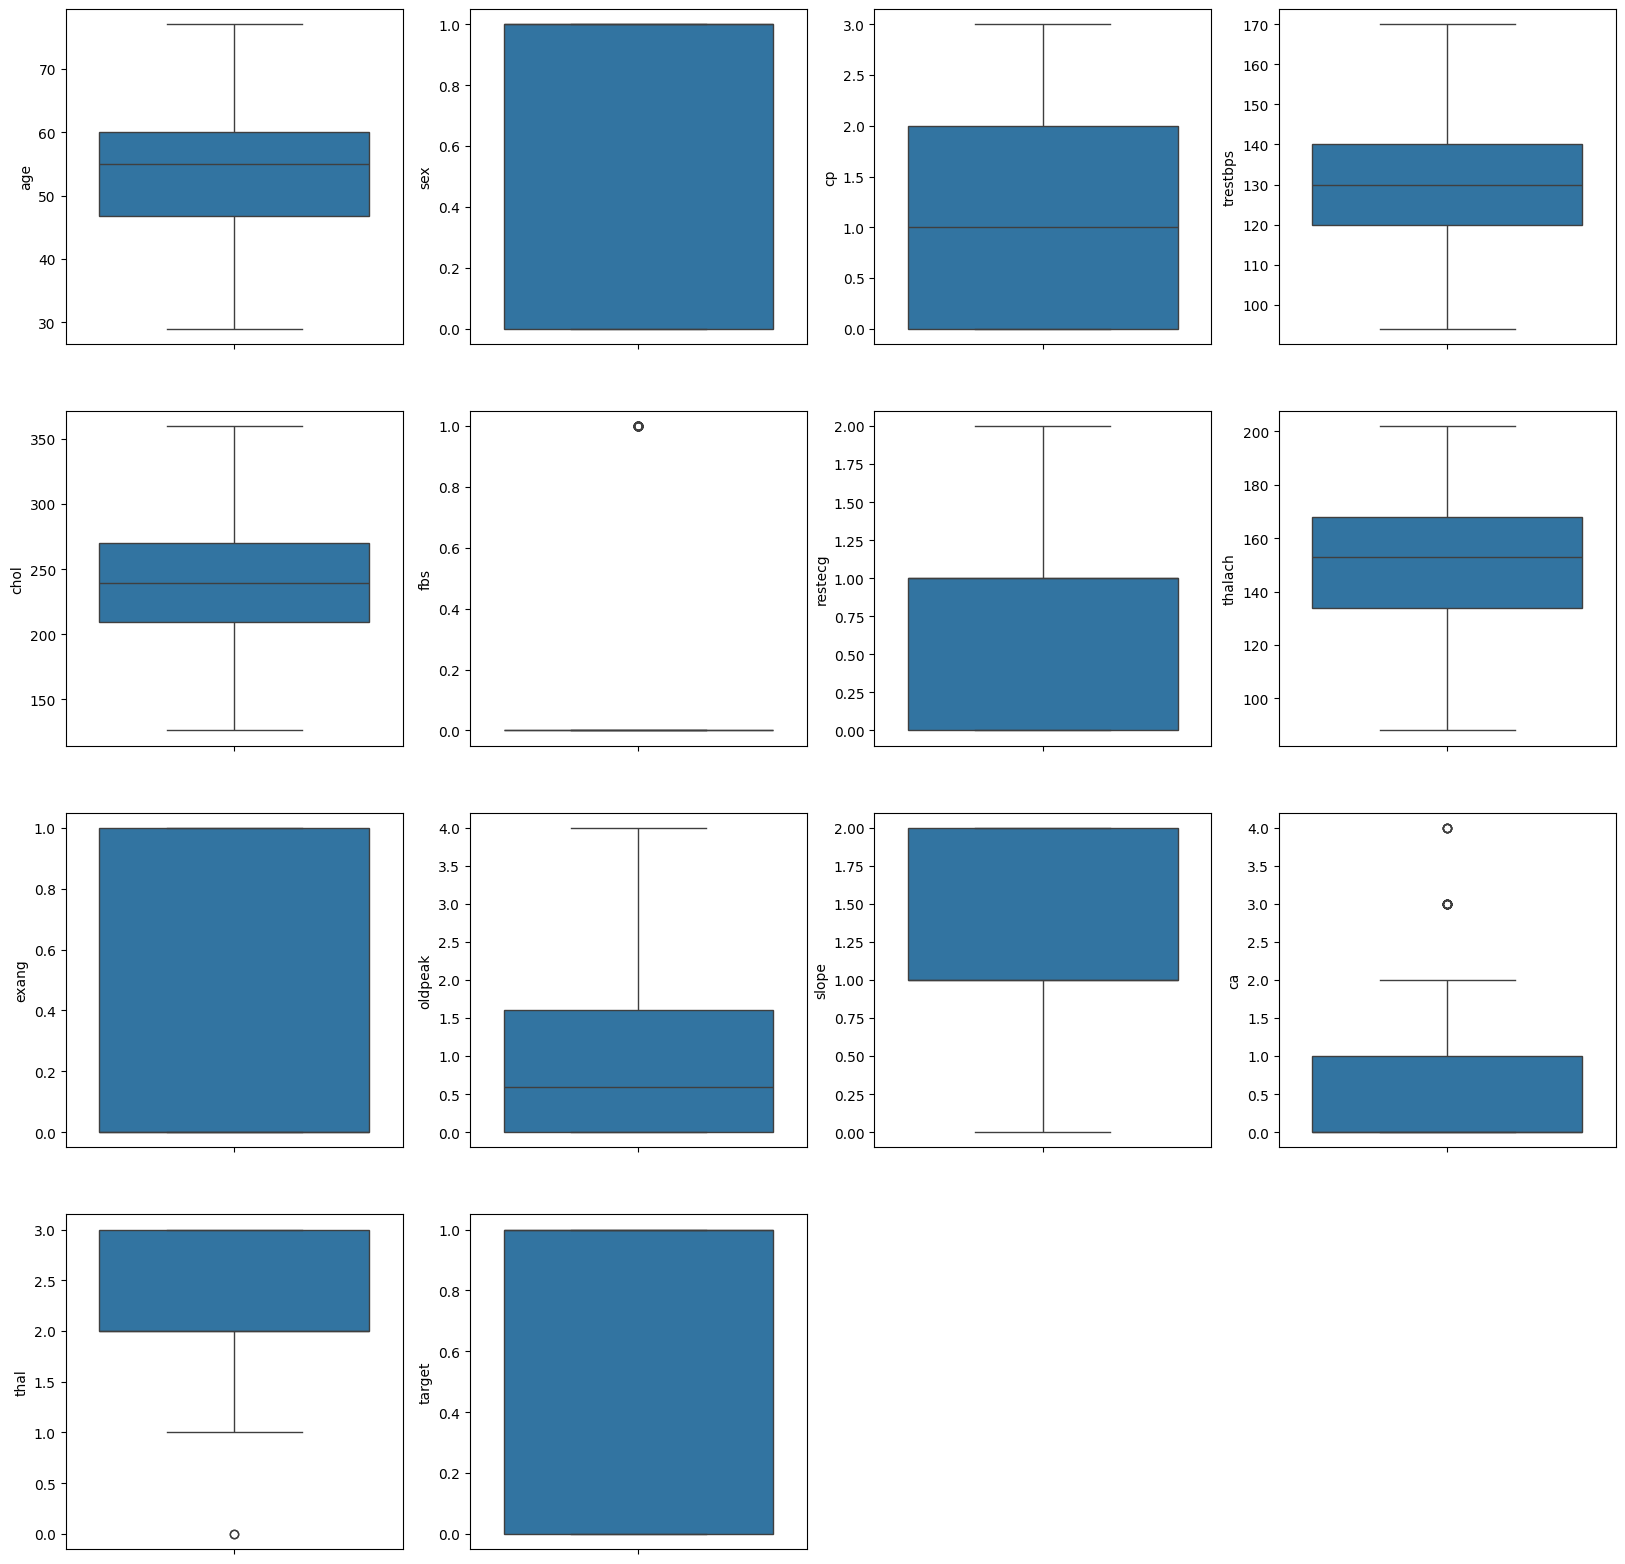

In [521]:
plt.figure(figsize=(20,20))
a=1

for i in columns_in_df:

    plt.subplot(4,4,a)

    sns.boxplot(data=df,y=i)

    a=a+1

In [522]:
x=df.drop(['target'],axis=1)
y=df['target']

In [523]:
columns_in_x=x.columns

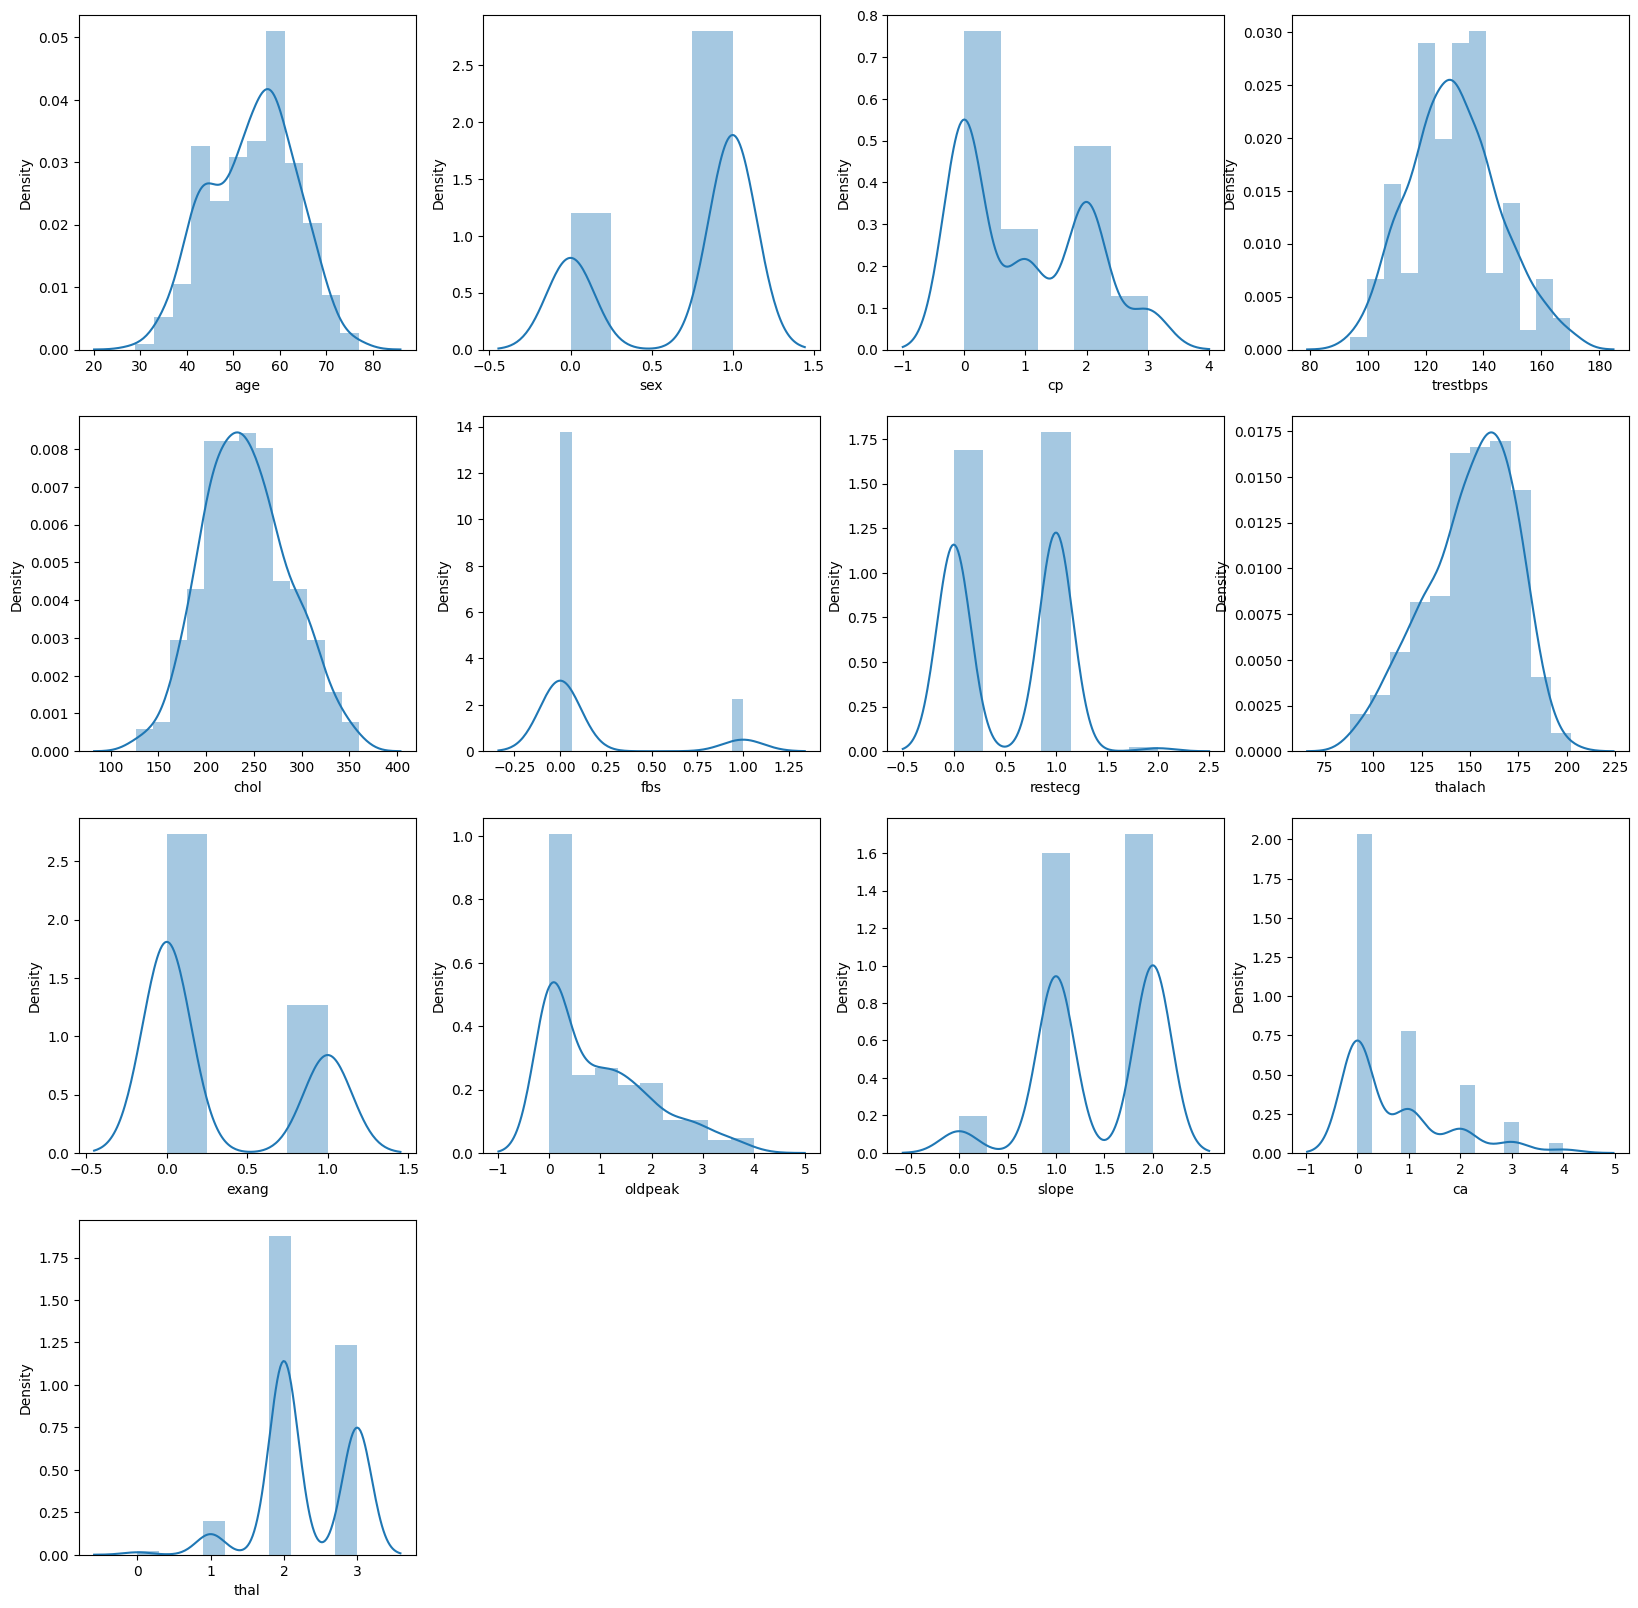

In [524]:
plt.figure(figsize=(20,20))
a=1
for i in columns_in_x:
    plt.subplot(4,4,a)
    sns.distplot(x[i])
    a=a+1

Applying Transfoemers

For Right-Skewed Curves

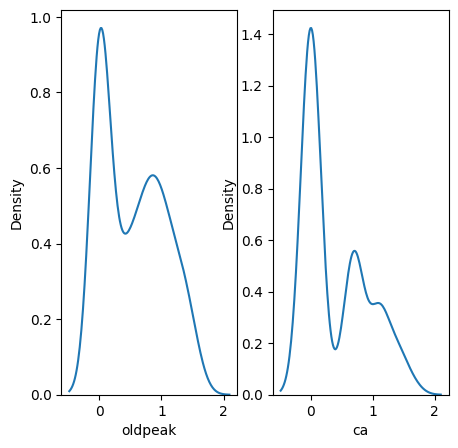

In [525]:
Right_skewed=['oldpeak','ca']

transformer=FunctionTransformer(func=np.log1p)

b=1

plt.figure(figsize=(5,5))

for i in Right_skewed:

    x[i]=transformer.fit_transform(x[i])

    plt.subplot(1,2,b)

    sns.kdeplot(data=x,x=i)

    b=b+1

For Left-Skewed curves

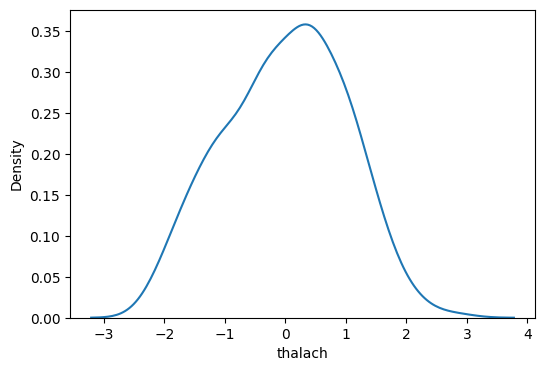

In [526]:
#from sklearn.preprocessing import PowerTransformer

power=PowerTransformer(method='yeo-johnson')

left_skewed = ['thalach']


plt.figure(figsize=(6, 4))

for col in left_skewed:

    x[col] = power.fit_transform(x[col].values.reshape(-1, 1))

    sns.kdeplot(data=x, x=col)

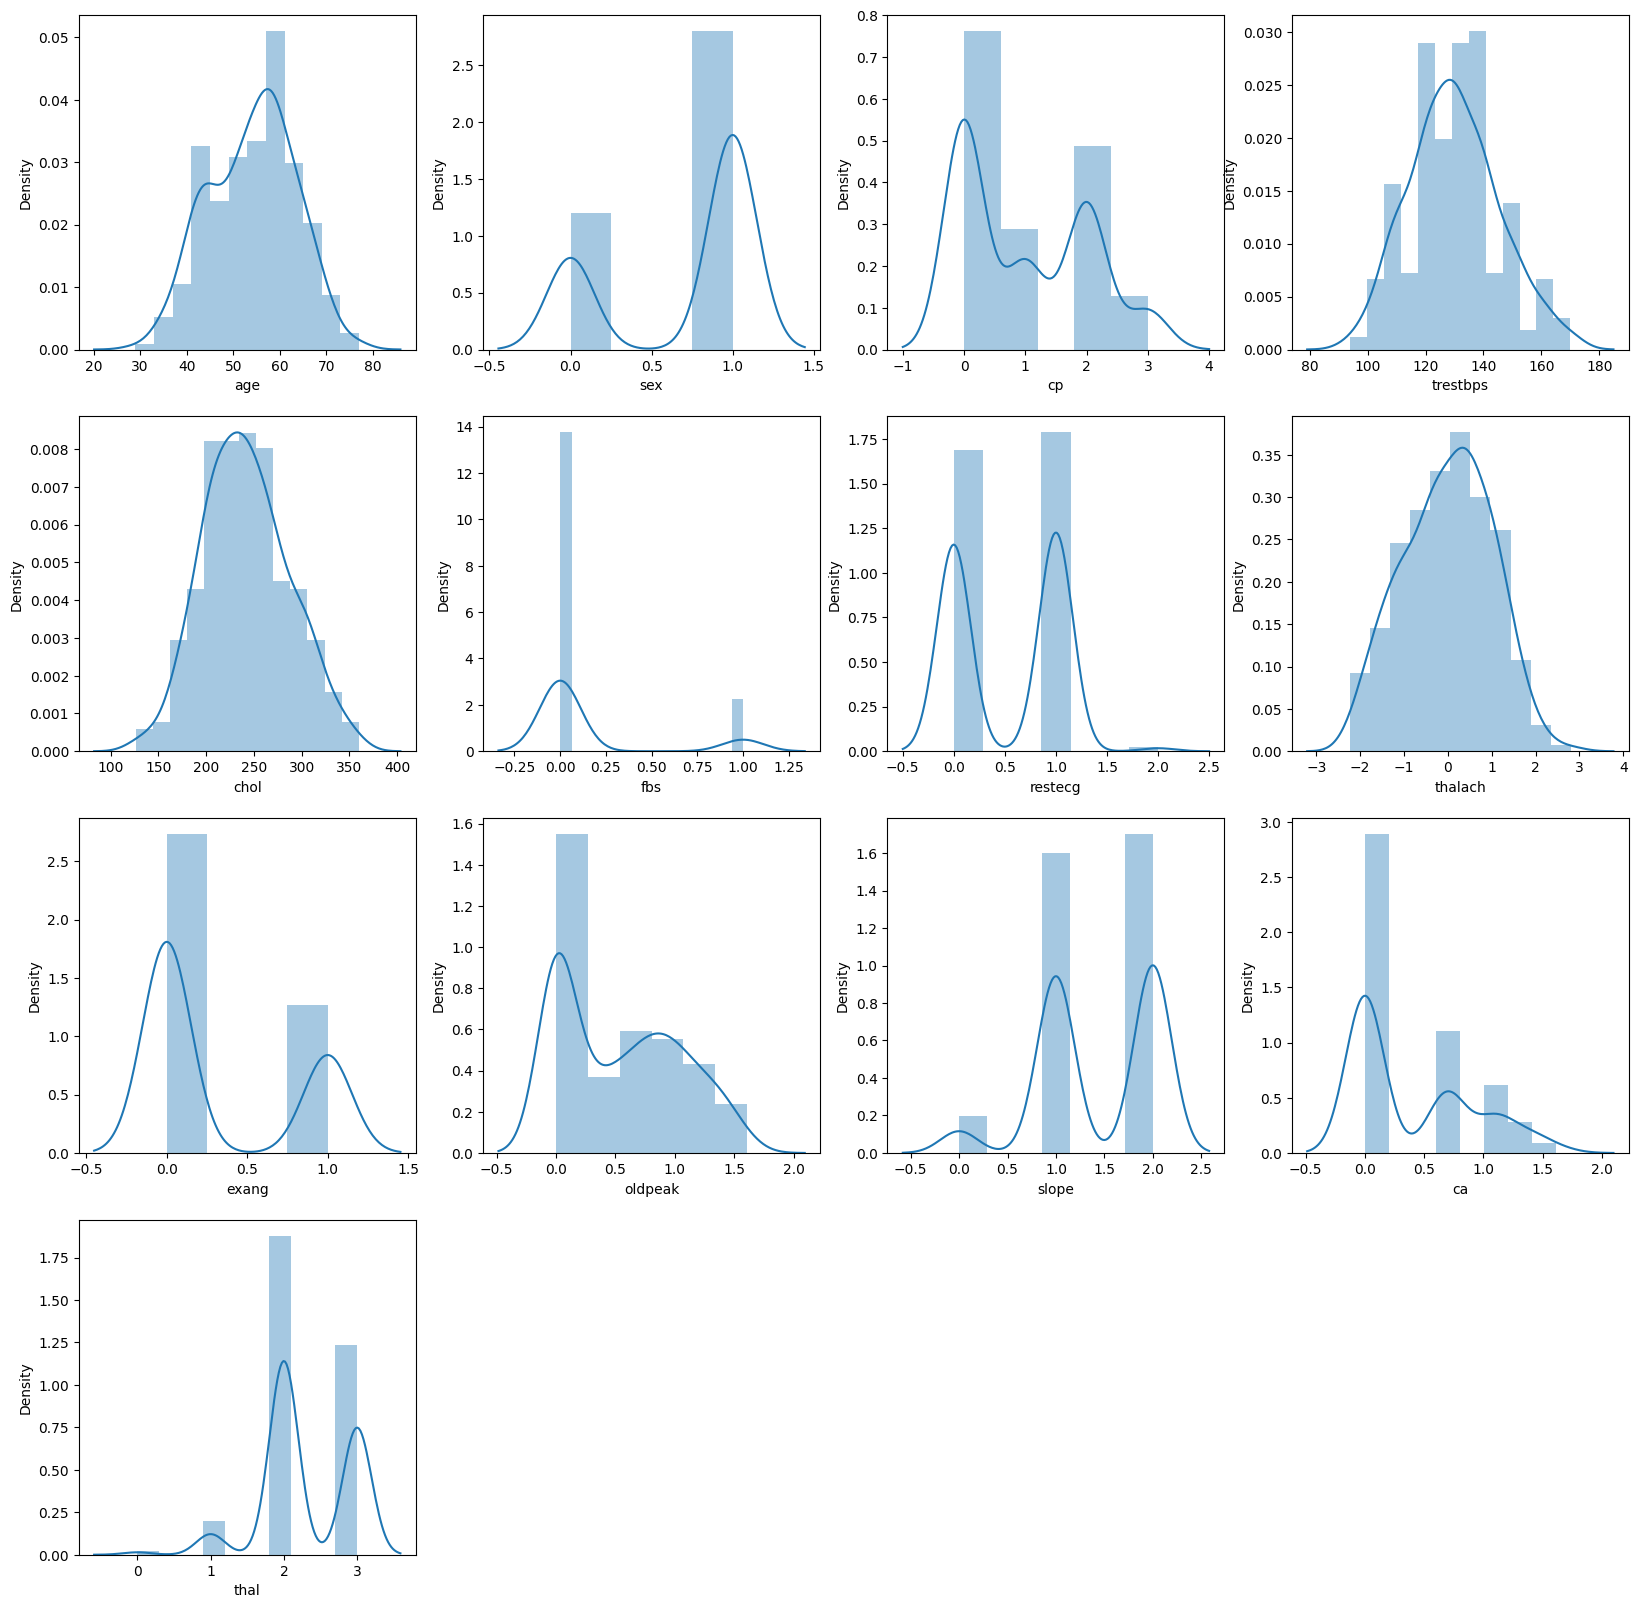

In [527]:
plt.figure(figsize=(20,20))
a=1

for i in columns_in_x:

    plt.subplot(4,4,a)

    sns.distplot(x[i])

    a=a+1

Splitting the data into training set and testing set

In [528]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

Standardizing the data

In [529]:
scalar=StandardScaler()

x_train=scalar.fit_transform(x_train)

x_test=scalar.transform(x_test)

Using Support Vector Machine

In [530]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [531]:
model=SVC()
model.fit(x_train,y_train)
x_test_predicted=model.predict(x_test)
accuracy_score(x_test_predicted,y_test)

0.8596491228070176

Hyper parameter tuning

In [532]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

Tuning on SVC

In [533]:
hypermodel=SVC()
parameters={'C':[0.01,0.1,1,10,100],'kernel':['rbf','poly']}

In [534]:
m=GridSearchCV(hypermodel,parameters,cv=10)

In [535]:
m.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'kernel': ['rbf', 'poly']})

In [536]:
m.best_params_

{'C': 1, 'kernel': 'rbf'}

In [537]:
new_model=SVC(kernel='rbf',C=1)
new_model.fit(x_train,y_train)
x_test_pred=new_model.predict(x_test)
accuracy_score(x_test_pred,y_test)

0.8596491228070176

Bulding a predictive system

In [538]:
import warnings
warnings.filterwarnings('ignore',category=UserWarning)

# user input data
input_data=[49,1,1,130,266,0,1,171,0,0.6,2,0,2]

# converting the input list to numpy array
input_data=np.asarray(input_data)

#reshaping the array as the model takes only 2D input
input_data_reshaped=input_data.reshape(1,-1)

#predicting the model
predict=new_model.predict(input_data_reshaped)

if predict[0]==0:
  print("The person is not have Heart Disease")
else:
  print("The Person has Heart Disease")

The Person has Heart Disease


In [539]:
import pickle

In [540]:
file_name="heart_disease_model.sav"
pickle.dump(new_model,open(file_name,"wb"))
loaded=pickle.load(open(file_name,"rb"))

In [541]:
loaded

SVC(C=1)

In [542]:
for column in x.columns:
  print(f"{column}")

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
